# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 2</span>


### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

1. sampling a uniform distribution in $[0,1]$
2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)

<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

### Esercizio 02.1 - Soluzione proposta

Per svolgere la prima parte dell'esercizio si è operato in modo analogo a quanto fatto nell'**Esercizio 01.1**, generando pseudocasualmente $M= 10000$ numeri distribuiti uniformemente in $[0, 1]$, calcolando la funzione $\displaystyle{\frac{\pi}{2}\cos(\pi x/2)}$ e stimandone la media a blocchi. 

I risultati ottenuti sono riportati nel grafico.

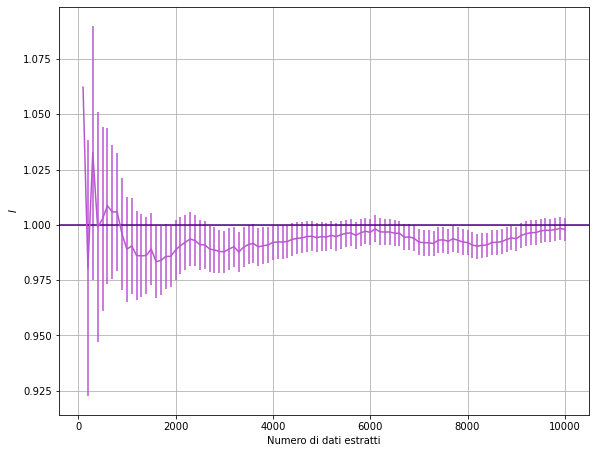

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es2/Average1') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[1]) for line in lines]
        err_prog = [float(line.split()[2]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, yerr=err_prog, color='mediumorchid')
plt.axhline(1., color='indigo') # horizontal
plt.xlabel('Numero di dati estratti')
plt.ylabel('$I$')
plt.grid(True)
plt.show()

Per la seconda parte dell'esercizio si è invece sfruttato il principio dell'_importance sampling_. 

Alla base di tale metodo computazionale giace il problema del calcolo di un integrale della forma:
$$ I = \int g(x) p(x) dx $$

Dove $p(x)$ è una distribuzione di probabilità. Prendendo la varianza come parametro per giudicare la bontà della stima di $I$, non è detto che la $p(x)$ sia la miglior _PDF_ da cui estrarre le $x$ per effettuare tale calcolo. Si nota dunque che l'integrale può essere stimato come:
$$I = \int \displaystyle{\frac{g(x) p(x)}{d(x)} d(x) dx}$$ 
$$d(x) \geq 0 \ \forall x, \quad \int d(x) dx = 1, \quad m \left( \left\{ x : \displaystyle{\frac{g(x) p(x)}{d(x)}} = \infty \right\} \right) = 0$$

L'_importance sampling_, tramite un principio variazionale, permette di affermare che la $d(x)$ che minimizza la varianza dell'integrale e che rispetta il vincolo di normalizzazione pari a $1$ è:
$$ d(x) = \displaystyle{\frac{p(x)g(x)}{I}} $$

Per poter usare tale _PDF_ dovrebbe essere già noto il valore di $I$: pur non potendo dunque minimizzare la varianza, è tuttavia possibile ridurla scegliendo una $d(x)$ simile all'integranda. 

Grazie a tale principio, si è dunque scelto di estrarre $x \in [0, 1]$ lungo $d(x) = 2(1 - x)$, ossia lo sviluppo di Taylor dell'integranda centrato in $x_0 = 1$ e normalizzato a $1$. In modo analogo a quanto fatto nell'**Esercizio 01.2**, si è invertita la funzione cumulativa: 
$$F(x) = 2x - x^2 $$
$$ y = F(x) $$

E si è ricavata $x$ generando uniformemente $y \in [0, 1]$:
$$ x = 1 - \sqrt{1 - y} $$

Si è quindi stimato il valore dell'integrale calcolando la media a blocchi di $\displaystyle{\frac{\pi}{2} \frac{\cos(\pi x/2)}{2(1-x)}}$; i risultati sono riportati nel grafico.

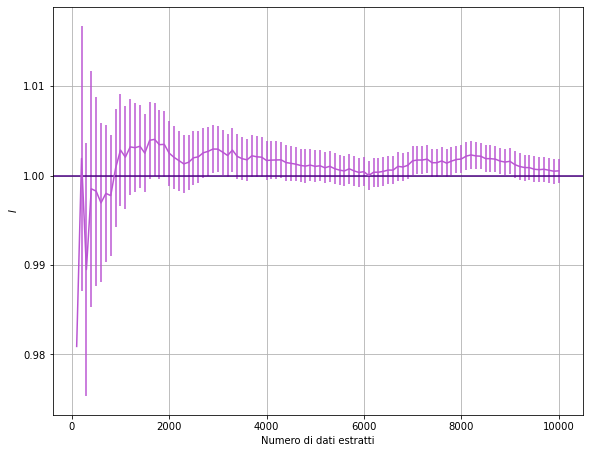

In [10]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

with open('Es2/Average2') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        sum_prog = [float(line.split()[1]) for line in lines]
        err_prog = [float(line.split()[2]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, sum_prog, yerr=err_prog, color='mediumorchid')
plt.axhline(1., color='indigo') # horizontal
plt.xlabel('Numero di dati estratti')
plt.ylabel('$I$')
plt.grid(True)
plt.show()

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$
2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

<span style="color:red">Show a picture of $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Suggestion: divide your $M$ throws into a reasonable number of blocks, compute $\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$ as function of the step $i\in [0,10^2]$ in each block and use these values (for fixed $i$) to obtain the average value and its statistical uncertainty.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

### Esercizio 02.2 - Soluzione proposta

Un _random walk_ costituisce un processo di Markov, ossia una catena di eventi in cui basta conoscere $(x_n, t_n)$ per ricavare $(x_{n+1}, t_{n+1})$.

Nell'esercizio proposto si sono simulati _random walk_ discreti e continui; in entrambi i casi, si è costruito un vettore di $3$ componenti, in cui sono state immagazzinate le coordinate.

Per il _random walk_ discreto, si è scelto di estrarre pseudocasualmente un numero intero tra $0$ e $6$: in base al suo valore, si è effettuato un passo in avanti o indietro lungo una delle $3$ direzioni del reticolo, per un totale di $100$ passi. La simulazione è stata ripetuta $M = 10000$ volte, calcolando la media a blocchi della distanza percorsa in funzione del numero di passi; l'andamento di $\sqrt{\langle |\vec{r}|^2 \rangle}$ è riportato nel grafico.

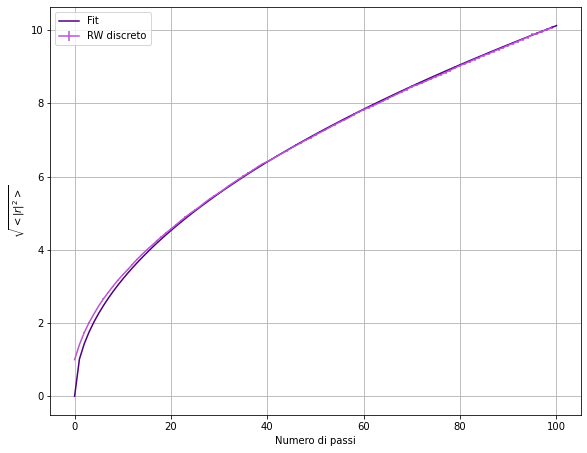


La miglior $k$ per il fit dei dati risulta essere:
- $k$ = 1.0122584839767506

Compatibile con la lunghezza del passo effettuato.


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

def sqrt_func(x, k):
    return k * np.sqrt(x)

# Fit data with a function of type k*sqrt(x)

with open('Es2/output_randomwalkdiscreto') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        r_av = [float(line.split()[1]) for line in lines]
        r_err = [float(line.split()[2]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, r_av, r_err, color = 'mediumorchid', label='RW discreto')

popt, _ = curve_fit(sqrt_func, x, r_av)
x_fit = np.linspace(0, 100, 100)
y_fit = sqrt_func(x_fit, *popt)
plt.plot(x_fit, y_fit, color='indigo', label='Fit')

plt.xlabel('Numero di passi')
plt.ylabel('$\sqrt{<|r|^2>}$')
plt.legend()

plt.grid(True)
plt.show()

md_text = f"""
La miglior $k$ per il fit dei dati risulta essere:
- $k$ = {popt[0]}

Compatibile con la lunghezza del passo effettuato.
"""
md_cell = get_ipython().run_cell_magic('markdown', '', md_text)

Per il _random walk_ continuo, si è scelto di estrarre pseudocasualmente una coppia di numeri pseudocasuali, $(\theta, \varphi)$, uniformemente distribuiti sulla sfera; si è prestata dunque particolare attenzione alla generazione dell'angolo polare, che risente della dipendenza dell'infinitesimo elemento di superficie sferica da $\theta$ stesso. Con il metodo di inversione della cumulativa già impiegato nell'**Esercizio 01.2** e nell'**Esercizio 02.1**, si è ottenuto: $$\theta = \arccos(2u - 1), \ u \in [0, 1] $$
$$\varphi = 2\pi v, \ v \in [0, 1] $$

Ottenuti gli angoli, si è effettuato uno spostamento lungo le direzioni opportunamente parametrizzate in coordinate sferiche, per un totale di $100$ passi. La simulazione è stata ripetuta $M = 10000$ volte, calcolando la media a blocchi della distanza percorsa in funzione del numero di passi; l'andamento di $\sqrt{\langle |\vec{r}|^2 \rangle}$ è riportato nel grafico.

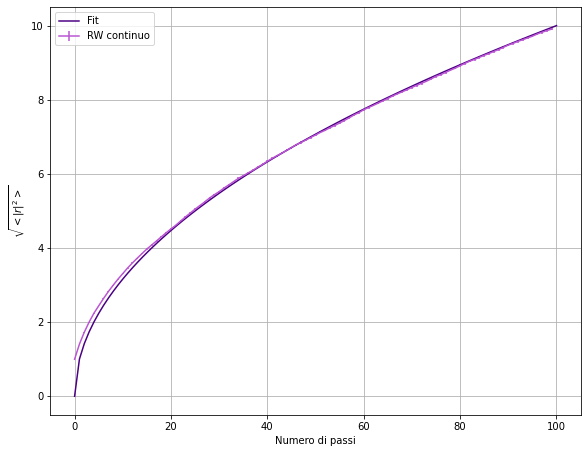


La miglior $k$ per il fit dei dati risulta essere:
- $k$ = 1.0010777101097654

Compatibile con la lunghezza del passo effettuato.


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit

def sqrt_func(x, k):
    return k * np.sqrt(x)

# Fit data with a function of type k*sqrt(x)

with open('Es2/output_randomwalkcontinuo') as f:
        lines = f.readlines()
        x = [float(line.split()[0]) for line in lines]
        r_av = [float(line.split()[1]) for line in lines]
        r_err = [float(line.split()[2]) for line in lines]
plt.figure(figsize=(9.5, 7.5))
plt.errorbar(x, r_av, r_err, color = 'mediumorchid', label='RW continuo')

popt, _ = curve_fit(sqrt_func, x, r_av)
x_fit = np.linspace(0, 100, 100)
y_fit = sqrt_func(x_fit, *popt)
plt.plot(x_fit, y_fit, color='indigo', label='Fit')

plt.xlabel('Numero di passi')
plt.ylabel('$\sqrt{<|r|^2>}$')
plt.legend()

plt.grid(True)
plt.show()

md_text = f"""
La miglior $k$ per il fit dei dati risulta essere:
- $k$ = {popt[0]}

Compatibile con la lunghezza del passo effettuato.
"""
md_cell = get_ipython().run_cell_magic('markdown', '', md_text)